# About The Dataset


The original source of the data is Australian Government's Bureau of Meteorology [http://www.bom.gov.au/climate/dwo/](http://www.bom.gov.au/climate/dwo/).

There are 2 datasets used in this project. They contain observations of weather metrics for each day. They have columns with the same definitions, column definitions were gathered from [http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml).

| Field         | Description                                           | Unit            | Type   |
| ------------- | ----------------------------------------------------- | --------------- | ------ |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| Location      | Location of the Observation                           | Location        | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | object |
| WindDir9am    | Wind direction averaged of 10 minutes prior to 9am    | Compass Points  | object |
| WindDir3pm    | Wind direction averaged of 10 minutes prior to 3pm    | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged of 10 minutes prior to 9am        | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged of 10 minutes prior to 3pm        | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was rain today                               | Yes/No          | object |
| RainTomorrow  | If there is rain tomorrow                             | Yes/No          | float  |

## Dataset 1

This dataset contains observations of weather metrics for each day from 2008 to 2017, named **weatherAUS.csv**. 

Actually, the website mentioned above do not provide the dataset anymore, so I use the dataset (which is a copy of the original dataset) from [https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package)


## Dataset 2

This dataset contains observations of weather metrics for each day from May 2023 to May 2024, in [http://www.bom.gov.au/climate/dwo/IDCJDW2124.latest.shtml](http://www.bom.gov.au/climate/dwo/IDCJDW2124.latest.shtml). 

The website do not provide a large dataset in a csv file, but 13 different csv files for 13 months, so that it is a task to handle with them.

# Main Code

### Importing the Dataset


In [1]:
import pandas as pd

input_file_names = [
    "IDCJDW2124.202305", "IDCJDW2124.202306", "IDCJDW2124.202307", "IDCJDW2124.202308", "IDCJDW2124.202309",
    "IDCJDW2124.202310", "IDCJDW2124.202311", "IDCJDW2124.202312", "IDCJDW2124.202401", "IDCJDW2124.202402",
    "IDCJDW2124.202403", "IDCJDW2124.202404", "IDCJDW2124.202405"
]
base_path = "data/"
rename_dict = {
              'Date': 'Date',
              'Time of maximum wind gust': 'TimeMaxWindGust',
              'Minimum temperature (°C)': 'MinTemp',
              'Maximum temperature (°C)': 'MaxTemp',
              'Rainfall (mm)': 'Rainfall',
              'Evaporation (mm)': 'Evaporation',
              'Sunshine (hours)': 'Sunshine',
              'Direction of maximum wind gust ': 'WindGustDir',
              'Speed of maximum wind gust (km/h)': 'WindGustSpeed',
              '9am Temperature (°C)': 'Temp9am',
              '9am relative humidity (%)': 'Humidity9am',
              '9am cloud amount (oktas)': 'Cloud9am',
              '9am wind direction': 'WindDir9am',
              '9am wind speed (km/h)': 'WindSpeed9am',
              '9am MSL pressure (hPa)': 'Pressure9am',
              '3pm Temperature (°C)': 'Temp3pm',
              '3pm relative humidity (%)': 'Humidity3pm',
              '3pm cloud amount (oktas)': 'Cloud3pm',
              '3pm wind direction': 'WindDir3pm',
              '3pm wind speed (km/h)': 'WindSpeed3pm',
              '3pm MSL pressure (hPa)': 'Pressure3pm'
}

combined_df = pd.DataFrame()

for file_name in input_file_names:
    input_file = f"{base_path}{file_name}.csv"
    temp_output_file = f"{base_path}{file_name}.cleaned.csv"

    try:
        with open(input_file, 'r', encoding='ISO-8859-1') as infile, open(temp_output_file, 'w', encoding='utf-8') as outfile:
            for line in infile:
                fields = line.strip().split(',')
                if len(fields) == 22:
                    outfile.write(','.join(fields[1:]) + '\n')
    except UnicodeDecodeError as e:
        print(f"UnicodeDecodeError: {e}")
        try:
            with open(input_file, 'r', encoding='cp1252') as infile, open(temp_output_file, 'w', encoding='utf-8') as outfile:
                for line in infile:
                    fields = line.strip().split(',')
                    if len(fields) == 22:
                        outfile.write(','.join(fields[1:]) + '\n')
        except UnicodeDecodeError as e:
            print(f"UnicodeDecodeError: {e}")

    df = pd.read_csv(temp_output_file, encoding='utf-8')
    
    for old_name, new_name in rename_dict.items():
        df.rename(columns={old_name: new_name}, inplace=True)
    
    df.drop(columns=['TimeMaxWindGust'], inplace=True)
    
    df.to_csv(temp_output_file, index=False)

    combined_df = pd.concat([combined_df, df], ignore_index=True)
    
combined_df['RainToday'] = combined_df['Rainfall'].apply(lambda x: 'Yes' if x > 0 else 'No')
combined_df['RainTomorrow'] = combined_df['Rainfall'].shift(-1).apply(lambda x: 'Yes' if x > 0 else 'No')
combined_df.to_csv("data/combined.csv", index=False)

In [2]:
other_df = pd.read_csv("data/weatherAUS.csv")
other_df = other_df[other_df['Location'] == 'Sydney']
other_df.drop(columns=['Location'], inplace=True)

output_df = pd.concat([other_df, combined_df], ignore_index=True)

output_file = "data/output.csv"
output_df.to_csv(output_file, index=False)

In [3]:
print(combined_df.shape)
print(other_df.shape)
print(output_df.shape)

(397, 22)
(3344, 22)
(3741, 22)


In [4]:
output_df

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,SSW,...,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,E,...,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,ESE,...,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,E,...,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,W,...,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3736,2024-05-27,10.2,21.3,0.0,3.0,9.5,W,30.0,W,S,...,76.0,51.0,1025.4,1024.1,1.0,1.0,13.8,19.6,No,No
3737,2024-05-28,9.7,22.4,0.0,2.4,9.1,WNW,26.0,W,E,...,82.0,58.0,1028.8,1026.0,0.0,0.0,12.7,20.7,No,No
3738,2024-05-29,9.4,21.3,0.0,1.4,9.3,WNW,22.0,WNW,ENE,...,87.0,68.0,1029.5,1025.4,0.0,0.0,13.1,20.2,No,No
3739,2024-05-30,10.8,24.2,0.0,2.6,8.3,NNW,31.0,WNW,NNE,...,90.0,48.0,1026.7,1021.9,1.0,7.0,14.2,23.0,No,No


In [4]:
data_types = output_df.dtypes
categorical_columns = data_types[data_types == 'object'].index
for col in categorical_columns:
    unique_values = output_df[col].unique()
    unique_values_count = len(unique_values)
    print(f"Column '{col}' is categorical with {unique_values_count} unique values.")
    if col != 'Date':
        for val in unique_values:
            print(val, end=", ")
    print("\n")

Column 'Date' is categorical with 3741 unique values.


Column 'WindGustDir' is categorical with 17 unique values.
nan, SSE, ESE, ENE, NNE, NNW, WNW, W, NW, SSW, NE, WSW, SE, SW, N, E, S, 

Column 'WindDir9am' is categorical with 17 unique values.
S, W, ESE, NNE, SSW, WNW, N, SW, SE, SSE, WSW, E, nan, ENE, NW, NNW, NE, 

Column 'WindDir3pm' is categorical with 18 unique values.
SSW, E, ESE, W, ENE, S, SE, SSE, NE, NNE, nan, NNW, NW, WNW, N, WSW, SW,  , 

Column 'WindSpeed3pm' is categorical with 45 unique values.
20.0, 13.0, 2.0, 6.0, 22.0, 15.0, 9.0, 26.0, 24.0, 30.0, 19.0, 17.0, 28.0, 31.0, nan, 4.0, 7.0, 11.0, 41.0, 39.0, 37.0, 35.0, 44.0, 33.0, 50.0, 48.0, 43.0, 0.0, 46.0, 57.0, 11, 17, 35, 13, 22, 30, 24, 20, 19, 15, 9, Calm, 39, 7, 2, 

Column 'RainToday' is categorical with 3 unique values.
Yes, No, nan, 

Column 'RainTomorrow' is categorical with 3 unique values.
Yes, No, nan, 



In [5]:
print(output_df.isna().sum())

Date                0
MinTemp             5
MaxTemp             7
Rainfall           12
Evaporation        72
Sunshine           21
WindGustDir      1045
WindGustSpeed    1045
WindDir9am         56
WindDir3pm         33
WindSpeed9am       26
WindSpeed3pm       25
Humidity9am        16
Humidity3pm        14
Pressure9am        21
Pressure3pm        19
Cloud9am          568
Cloud3pm          563
Temp9am             5
Temp3pm             5
RainToday           7
RainTomorrow        7
dtype: int64


### Data Preprocessing


In [6]:
df = output_df.copy()

In [7]:
df.dropna(subset=['RainToday', 'RainTomorrow', 'Rainfall'], inplace=True)
df.shape

(3723, 22)

In [8]:
df['WindSpeed3pm'].replace('Calm', 0.0, inplace=True)
df['WindSpeed3pm'] = df['WindSpeed3pm'].astype(float)

In [9]:
df.replace(['No', 'Yes'], [0,1], inplace=True)

In [10]:
cloud9am_correlation_coefficient = df['Cloud9am'].corr(df['RainTomorrow'])
print(f"Correlation between Cloud9am and RainTomorrow: {cloud9am_correlation_coefficient}")

cloud3pm_correlation_coefficient = df['Cloud3pm'].corr(df['RainTomorrow'])
print(f"Correlation between Cloud3pm and RainTomorrow: {cloud3pm_correlation_coefficient}")

windgustspeed_correlation_coefficient = df['WindGustSpeed'].corr(df['RainTomorrow'])
print(f"Correlation between WindGustSpeed and RainTomorrow: {windgustspeed_correlation_coefficient}")

Correlation between Cloud9am and RainTomorrow: 0.3727035136751936
Correlation between Cloud3pm and RainTomorrow: 0.45764003475226217
Correlation between WindGustSpeed and RainTomorrow: 0.18442526352429942


In [11]:
df.drop(columns=['WindGustSpeed'], inplace=True)

In [12]:
df['Date'] = pd.to_datetime(df['Date'])

df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

max_temp_by_month_year = df.groupby(['Year', 'Month'])[['MaxTemp']].max()
min_temp_by_month_year = df.groupby(['Year', 'Month'])[['MinTemp']].min()
mean_evaporation_by_month_year = df.groupby(['Year', 'Month'])[['Evaporation']].mean()
mean_sunshine_by_month_year = df.groupby(['Year', 'Month'])[['Sunshine']].mean()
mean_windspeed9am_by_month_year = df.groupby(['Year', 'Month'])[['WindSpeed9am']].mean()
mean_windspeed3pm_by_month_year = df.groupby(['Year', 'Month'])[['WindSpeed3pm']].mean()
mean_humidity9am_by_month_year = df.groupby(['Year', 'Month'])[['Humidity9am']].mean()
mean_humidity3pm_by_month_year = df.groupby(['Year', 'Month'])[['Humidity3pm']].mean()
mean_pressure9am_by_month_year = df.groupby(['Year', 'Month'])[['Pressure9am']].mean()
mean_pressure3pm_by_month_year = df.groupby(['Year', 'Month'])[['Pressure3pm']].mean()
mean_cloud9am_by_month_year = df.groupby(['Year', 'Month'])[['Cloud9am']].mean()
mean_cloud3pm_by_month_year = df.groupby(['Year', 'Month'])[['Cloud3pm']].mean()
mean_temp9am_by_month_year = df.groupby(['Year', 'Month'])[['Temp9am']].mean()
mean_temp3pm_by_month_year = df.groupby(['Year', 'Month'])[['Temp3pm']].mean()

def fillna_with_group_month(row, column_name, groupby_values):
    if pd.isna(row[column_name]):
        row[column_name] = groupby_values.loc[row['Year'], row['Month']][column_name]
    return row

df[['MaxTemp']] = df.apply(fillna_with_group_month, args=('MaxTemp', max_temp_by_month_year), axis=1)[['MaxTemp']]
df[['MinTemp']] = df.apply(fillna_with_group_month, args=('MinTemp', min_temp_by_month_year), axis=1)[['MinTemp']]
df[['Evaporation']] = df.apply(fillna_with_group_month, args=('Evaporation', mean_evaporation_by_month_year), axis=1)[['Evaporation']]
df[['Sunshine']] = df.apply(fillna_with_group_month, args=('Sunshine', mean_sunshine_by_month_year), axis=1)[['Sunshine']]
df[['WindSpeed9am']] = df.apply(fillna_with_group_month, args=('WindSpeed9am', mean_windspeed9am_by_month_year), axis=1)[['WindSpeed9am']]
df[['WindSpeed3pm']] = df.apply(fillna_with_group_month, args=('WindSpeed3pm', mean_windspeed3pm_by_month_year), axis=1)[['WindSpeed3pm']]
df[['Humidity9am']] = df.apply(fillna_with_group_month, args=('Humidity9am', mean_humidity9am_by_month_year), axis=1)[['Humidity9am']]
df[['Humidity3pm']] = df.apply(fillna_with_group_month, args=('Humidity3pm', mean_humidity3pm_by_month_year), axis=1)[['Humidity3pm']]
df[['Pressure9am']] = df.apply(fillna_with_group_month, args=('Pressure9am', mean_pressure9am_by_month_year), axis=1)[['Pressure9am']]
df[['Pressure3pm']] = df.apply(fillna_with_group_month, args=('Pressure3pm', mean_pressure3pm_by_month_year), axis=1)[['Pressure3pm']]
df[['Cloud9am']] = df.apply(fillna_with_group_month, args=('Cloud9am', mean_cloud9am_by_month_year), axis=1)[['Cloud9am']]
df[['Cloud3pm']] = df.apply(fillna_with_group_month, args=('Cloud3pm', mean_cloud3pm_by_month_year), axis=1)[['Cloud3pm']]
df[['Temp9am']] = df.apply(fillna_with_group_month, args=('Temp9am', mean_temp9am_by_month_year), axis=1)[['Temp9am']]
df[['Temp3pm']] = df.apply(fillna_with_group_month, args=('Temp3pm', mean_temp3pm_by_month_year), axis=1)[['Temp3pm']]

df.drop(columns=['Month', 'Year'], inplace=True)

In [13]:
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mean())

In [14]:
print(df.isna().sum())

Date               0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir     1041
WindDir9am        56
WindDir3pm        33
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday          0
RainTomorrow       0
dtype: int64


In [15]:
import scipy.stats as ss
import numpy as np

def cramers_v(contingency_table):
    chi2 = ss.chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    return np.sqrt(chi2 / (n * min_dim))

print(f"Cramér's V between WindGustDir and RainTomorrow: {cramers_v(pd.crosstab(df['WindGustDir'], df['RainTomorrow']))}")
print(f"Cramér's V between WindDir9am and RainTomorrow: {cramers_v(pd.crosstab(df['WindDir9am'], df['RainTomorrow']))}")
print(f"Cramér's V between WindDir3pm and RainTomorrow: {cramers_v(pd.crosstab(df['WindDir3pm'], df['RainTomorrow']))}")

Cramér's V between WindGustDir and RainTomorrow: 0.3288554557950443
Cramér's V between WindDir9am and RainTomorrow: 0.23749997584723245
Cramér's V between WindDir3pm and RainTomorrow: 0.3170455218876473


In [16]:
df = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

In [17]:
print(df.isna().sum())
data_types = df.dtypes
categorical_columns = data_types[data_types == 'object'].index
if len(categorical_columns) == 0:
    print("\nNo categorical anymore")

Date              0
MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
                 ..
WindDir3pm_SSW    0
WindDir3pm_SW     0
WindDir3pm_W      0
WindDir3pm_WNW    0
WindDir3pm_WSW    0
Length: 68, dtype: int64

No categorical anymore


In [18]:
df.drop('Date',axis=1,inplace=True)

In [19]:
from scipy.stats import zscore
for column in df.select_dtypes(include='number').columns:
    if column != 'RainTomorrow':
        z_scores = zscore(df[column])
        threshold = 6
        df = df[(abs(z_scores) <= threshold)]
df.reset_index(drop=True, inplace=True)
df.shape

(3698, 67)

### Training Data and Test Data


In [20]:
df = df.astype(float)

In [21]:
X = df.drop(columns='RainTomorrow', axis=1)
y = df['RainTomorrow']
print(X.shape)
print(y.shape)

(3698, 66)
(3698,)


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [23]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# import sklearn.metrics as metrics

In [110]:
def plot_roc_curve(y_true, y_probabilities, model_name='Model'):
    fpr, tpr, thresholds = roc_curve(y_true, y_probabilities)
    roc_auc = auc(fpr, tpr)
    distances_to_corner = np.sqrt((fpr - 0)**2 + (tpr - 1)**2)
    optimal_idx = np.argmin(distances_to_corner)
    optimal_threshold = thresholds[optimal_idx]
    
    plt.figure(figsize=(5, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red', label=f'Optimal Threshold = {optimal_threshold:.2f}')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    
    print(f'Optimal threshold that minimizes distance to (0, 1) in ROC space: {optimal_threshold}')
    
    return optimal_threshold

### KNN


In [48]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=4)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [53]:
KNN_probabilities = KNN.predict_proba(np.array(X_test))[:, 1]

C:\Users\hp450\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


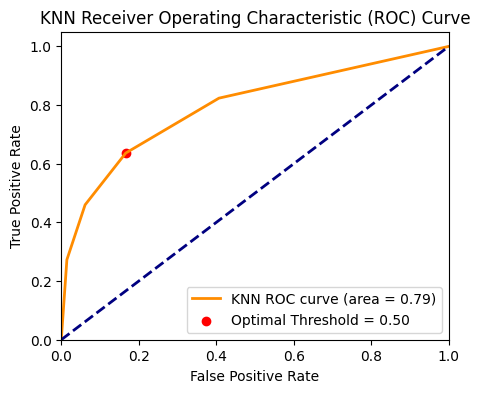

Optimal threshold that minimizes distance to (0, 1) in ROC space: 0.5


In [111]:
optimal_threshold = plot_roc_curve(y_test, KNN_probabilities, model_name='KNN')

In [112]:
KNN_predictions = KNN.predict(np.array(X_test))

C:\Users\hp450\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [113]:
KNN_Accuracy_Score = accuracy_score(y_test, KNN_predictions)
KNN_JaccardIndex = jaccard_score(y_test, KNN_predictions, average='weighted')
KNN_F1_Score = f1_score(y_test, KNN_predictions, average='weighted')

print(f"KNN_Accuracy_Score: {KNN_Accuracy_Score}")
print(f"KNN_JaccardIndex: {KNN_JaccardIndex}")
print(f"KNN_F1_Score: {KNN_F1_Score}")

KNN_Accuracy_Score: 0.8175675675675675
KNN_JaccardIndex: 0.6913754792195159
KNN_F1_Score: 0.8028705788688126


### Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier
Tree = DecisionTreeClassifier()
Tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [61]:
Tree_predictions = Tree.predict(X_test)

In [62]:
Tree_Accuracy_Score = accuracy_score(y_test, Tree_predictions)
Tree_JaccardIndex = jaccard_score(y_test, Tree_predictions, average='weighted')
Tree_F1_Score = f1_score(y_test, Tree_predictions, average='weighted')

print(f"Tree_Accuracy_Score: {Tree_Accuracy_Score}")
print(f"Tree_JaccardIndex: {Tree_JaccardIndex}")
print(f"Tree_F1_Score: {Tree_F1_Score}")

Tree_Accuracy_Score: 0.7391891891891892
Tree_JaccardIndex: 0.6107380124189712
Tree_F1_Score: 0.7479599259046547


### Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier
Forest = RandomForestClassifier(n_estimators=200, random_state=24)
Forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=24)

In [71]:
Forest_probabilities = Forest.predict_proba(X_test)[:, 1]

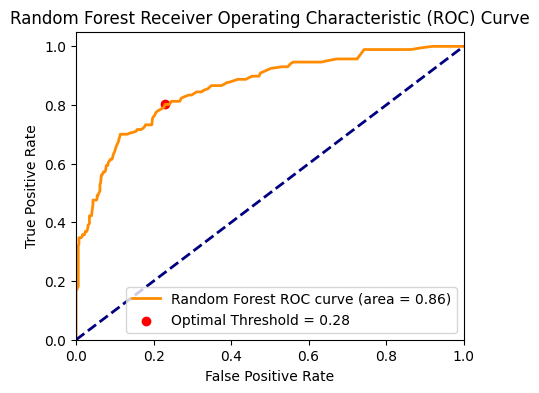

Optimal threshold that minimizes distance to (0, 1) in ROC space: 0.28


In [114]:
optimal_threshold = plot_roc_curve(y_test, Forest_probabilities, model_name='Random Forest')

In [115]:
Forest_predictions = (Forest_probabilities > optimal_threshold).astype(int)

In [116]:
Forest_Accuracy_Score = accuracy_score(y_test, Forest_predictions)
Forest_JaccardIndex = jaccard_score(y_test, Forest_predictions, average='weighted')
Forest_F1_Score = f1_score(y_test, Forest_predictions, average='weighted')

print(f"Forest_Accuracy_Score: {Forest_Accuracy_Score}")
print(f"Forest_JaccardIndex: {Forest_JaccardIndex}")
print(f"Forest_F1_Score: {Forest_F1_Score}")

Forest_Accuracy_Score: 0.7783783783783784
Forest_JaccardIndex: 0.6601475435934895
Forest_F1_Score: 0.7897523098546116


### Logistic Regression


In [117]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='liblinear')
LR.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [118]:
LR_probabilities = LR.predict_proba(X_test)[:,1]

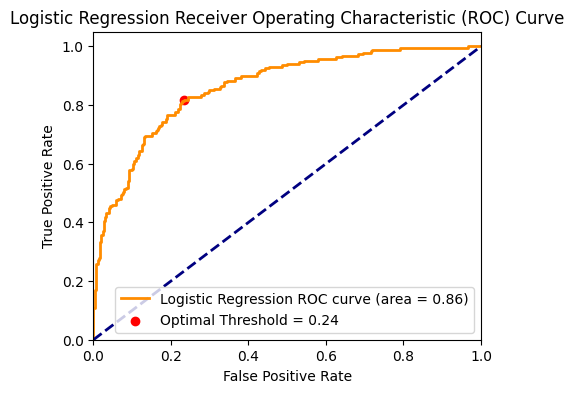

Optimal threshold that minimizes distance to (0, 1) in ROC space: 0.23983236020308615


In [119]:
optimal_threshold = plot_roc_curve(y_test, LR_probabilities, model_name='Logistic Regression')

In [120]:
LR_predictions = (LR_probabilities > optimal_threshold).astype(int)

In [121]:
LR_Accuracy_Score = accuracy_score(y_test, LR_predictions)
LR_JaccardIndex = jaccard_score(y_test, LR_predictions, average='weighted')
LR_F1_Score = f1_score(y_test, LR_predictions, average='weighted')

print(f"LR_Accuracy_Score: {LR_Accuracy_Score}")
print(f"LR_JaccardIndex: {LR_JaccardIndex}")
print(f"LR_F1_Score: {LR_F1_Score}")

LR_Accuracy_Score: 0.7783783783783784
LR_JaccardIndex: 0.6604206376358276
LR_F1_Score: 0.790342546864286


### SVM


In [97]:
from sklearn import svm
SVM = svm.SVC(kernel='rbf', C=10)
SVM.fit(X_train, y_train)

SVC(C=10)

In [99]:
SVM_predictions = SVM.predict(X_test)

In [100]:
SVM_Accuracy_Score = accuracy_score(y_test, SVM_predictions)
SVM_JaccardIndex = jaccard_score(y_test, SVM_predictions, average='weighted')
SVM_F1_Score = f1_score(y_test, SVM_predictions, average='weighted')

print(f"SVM_Accuracy_Score: {SVM_Accuracy_Score}")
print(f"SVM_JaccardIndex: {SVM_JaccardIndex}")
print(f"SVM_F1_Score: {SVM_F1_Score}")

SVM_Accuracy_Score: 0.8216216216216217
SVM_JaccardIndex: 0.6805067170175457
SVM_F1_Score: 0.7863752142386289


### Gradient Boosting


In [122]:
from sklearn.ensemble import GradientBoostingClassifier
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "log_loss",
}
GBC = GradientBoostingClassifier(**params)
GBC.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=4, min_samples_split=5,
                           n_estimators=500)

In [123]:
GBC_probabilities = GBC.predict_proba(X_test)[:,1]

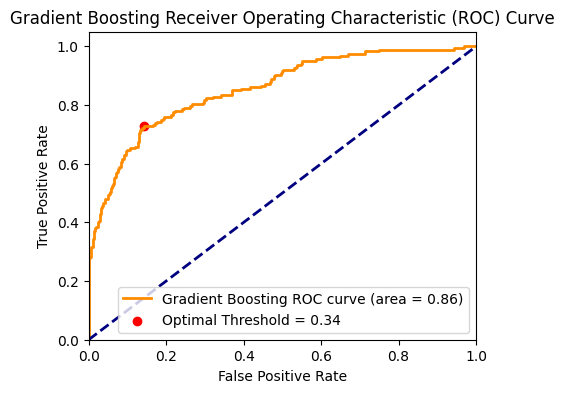

Optimal threshold that minimizes distance to (0, 1) in ROC space: 0.3397717622464369


In [124]:
optimal_threshold = plot_roc_curve(y_test, GBC_probabilities, model_name='Gradient Boosting')

In [125]:
GBC_predictions = (GBC_probabilities > optimal_threshold).astype(int)

In [126]:
GBC_Accuracy_Score = accuracy_score(y_test, GBC_predictions)
GBC_JaccardIndex = jaccard_score(y_test, GBC_predictions, average='weighted')
GBC_F1_Score = f1_score(y_test, GBC_predictions, average='weighted')

print(f"GBC_Accuracy_Score: {GBC_Accuracy_Score}")
print(f"GBC_JaccardIndex: {GBC_JaccardIndex}")
print(f"GBC_F1_Score: {GBC_F1_Score}")

GBC_Accuracy_Score: 0.822972972972973
GBC_JaccardIndex: 0.7137371880673314
GBC_F1_Score: 0.8267178470675752


### Report


In [129]:
Report = pd.DataFrame({
    'Model':         ['KNN',              'Decision Tree',     'Random Forest',       'Logistic Regression',  'SVM',               'Gradient Boosting'],
    'Accuracy':      [KNN_Accuracy_Score, Tree_Accuracy_Score, Forest_Accuracy_Score, LR_Accuracy_Score,      SVM_Accuracy_Score,  GBC_Accuracy_Score],
    'Jaccard Index': [KNN_JaccardIndex,   Tree_JaccardIndex,   Forest_JaccardIndex,   LR_JaccardIndex,        SVM_JaccardIndex,    GBC_JaccardIndex],
    'F1 Score':      [KNN_F1_Score,       Tree_F1_Score,       Forest_F1_Score,       LR_F1_Score,            SVM_F1_Score,        GBC_F1_Score]
})

Report

,Model,Accuracy,Jaccard Index,F1 Score
0,KNN,0.817568,0.691375,0.802871
1,Decision Tree,0.739189,0.610738,0.747960
2,Random Forest,0.778378,0.660148,0.789752
3,Logistic Regression,0.778378,0.660421,0.790343
4,SVM,0.821622,0.680507,0.786375
5,Gradient Boosting,0.822973,0.713737,0.826718


In [130]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score

classifiers = {
    "KNN": KNN_predictions,
    "Decision Tree": Tree_predictions,
    "Random Forest": Forest_predictions,
    "Logistic Regression": LR_predictions,
    "SVM": SVM_predictions,
    "Gradient Boosting": GBC_predictions
}

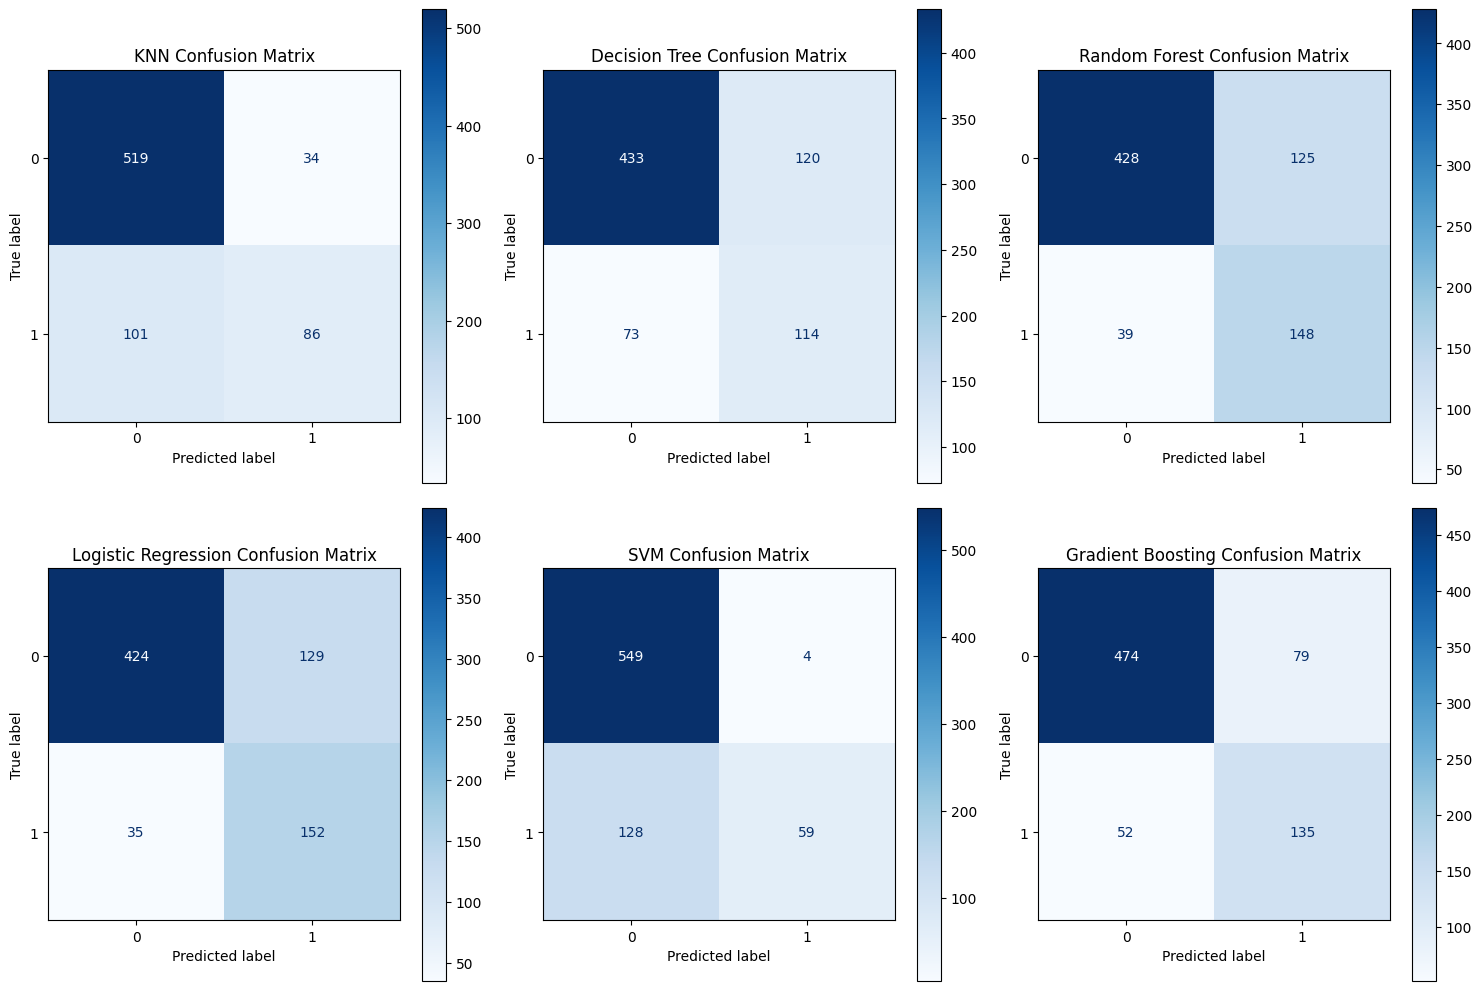

In [131]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axes = axes.flatten()

for ax, (name, predictions) in zip(axes, classifiers.items()):
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, cmap=plt.cm.Blues)
    ax.set_title(f"{name} Confusion Matrix")

for ax in axes[len(classifiers):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()